In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.colors import ListedColormap

In [ ]:
# veri setini yükle
iris = datasets.load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA ile boyutu 2ye indir
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Eğitim/Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# rbf kernel ile SVM modeli oluşturma ve eğitme
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

# tahmin ve sonuçlar
y_pred = model.predict(X_test)

print(f"Klasik SVM Başarı Oranı: %{accuracy_score(y_test, y_pred)*100:.2f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Klasik SVM Başarı Oranı: %93.33

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



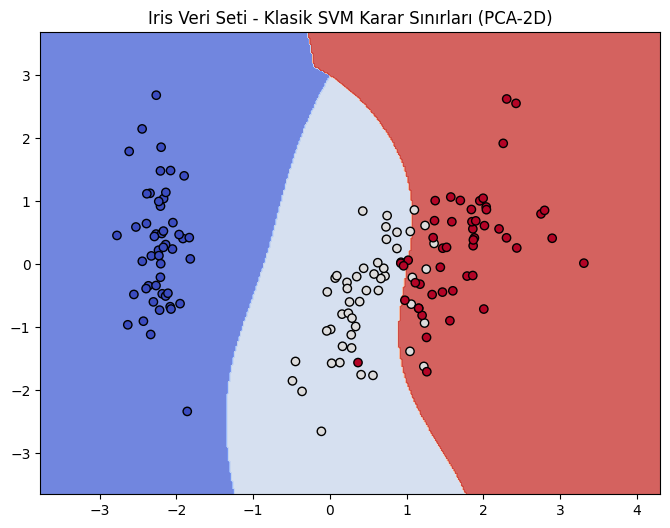

In [ ]:
# Karar sınırı görselleştirme
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
# Görselleştirme
fig, ax = plt.subplots(figsize=(8, 6))
xx, yy = np.meshgrid(np.arange(X_pca[:, 0].min()-1, X_pca[:, 0].max()+1, 0.02),
                     np.arange(X_pca[:, 1].min()-1, X_pca[:, 1].max()+1, 0.02))
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_title("Iris Veri Seti - Klasik SVM Karar Sınırları (PCA-2D)")
plt.show()